# Edge detection

In this lab exercise, you will look at applying edge detectors to images and comparing two different methods. You will also learn how to write a function in Python and evaluate the difference when using an approximation for the calculation of a parameter.

At this stage, we will assume that you are able to use Python, and understand its basic use. **You are asked to write a short (no more than 2 pages) report of your work**, answering specific questions, and showing example images. This work is not assessed (it will not count towards your module mark) but you will get formative feedback.

Three images are provided for the assignment, 'cameraman.png', 'circle.jpg', 'mri2.jpg', please feel free to use **any of them** to explore the tasks. Following we take 'cameraman.png' as an example.

### Introduction

First we will cover some basics regarding Python and Image Manipulation.

The first step is importing the required packages. In this assignment we will be using [scikit-image](https://scikit-image.org/), [MatPlotLib](https://matplotlib.org/) and [Numpy](https://numpy.org/). We have also provided helper functions for displaying the images inline (utils.py). Check that your environment is configured correctly by running the section below. 

In [1]:
# Imports
import skimage
import scipy
from matplotlib import pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter, convolve
import os

os.getcwd()

'/home/yuqi/yuqi_phd/projects/TA/CV-TA2025-2026/W4Lab_Students2025'

In order to load images we use the [imread](https://scikit-image.org/docs/stable/user_guide/getting_started.html) function which is part of scikit-image. Images can be displayed using the show_rgb_image helper function. Read through this function to understand how it works. We can also see the raw image data by printing the variable using ```print```. As can be seen, by default in Skimage image pixels are represented as bytes with a range of 0-255. Depending on the processing methods, consider a normalised version of the image in the [0.0, 1.0] range by dividing the image by its maximum intensity value.

**Important** Make sure your working directory is the same containing your Jupyter lab file (Using import os and os.getcwd())

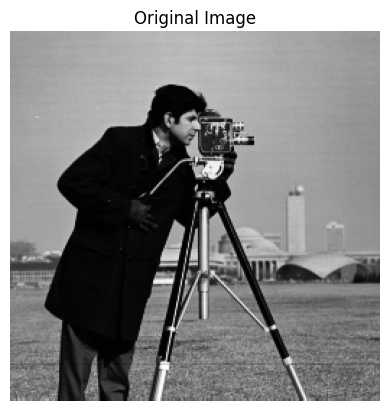

Shakey raw values [[156 159 158 ... 151 152 152]
 [160 154 157 ... 154 155 153]
 [156 159 158 ... 151 152 152]
 ...
 [114 132 123 ... 135 137 114]
 [121 126 130 ... 133 130 113]
 [121 126 130 ... 133 130 113]]


In [2]:

# Read image
inputimg = skimage.io.imread('cameraman.png')

# Display the image
plt.imshow(inputimg,cmap="gray")
plt.title("Original Image")
plt.axis('off')
plt.show()

print("Shakey raw values", inputimg)

In scikit we perform convolution using the convolve2d function. Kernels can be defined as numpy arrays as seen below. A detailed guide to this function can be found here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

In [3]:
sobel_x = np.array(
    [[1,0,-1],
     [2,0,-2],
     [1,0,-1]])

sobel_y = np.array(
    [[1,2,1],
     [0,0,0],
     [-1,-2,-1]])

print(sobel_y)

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


X-gradient values:
[[156 159   2 ...   1 152 152]
 [472 472   1 ...   1 459 457]
 [632 626   2 ...   0 614 610]
 ...
 [477 510  36 ...  81 527 453]
 [363 378  27 ...  60 390 339]
 [121 126   9 ...  20 130 113]]


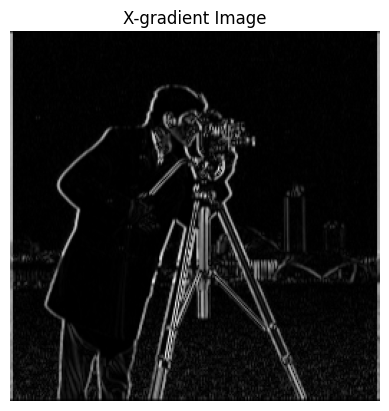

In [4]:
# Applying a filter
# We convert the output type to floats in order to preserve negative gradients
# We can also threshold the image using the > operator
output_sobel_x = abs(scipy.signal.convolve2d(inputimg, sobel_x))#>50

print("X-gradient values:")
print(output_sobel_x)

# Here we use the binary helper function as our image is now binary
#show_binary_image(output_sobel_x)
plt.imshow(output_sobel_x,cmap="gray")
plt.title("X-gradient Image")
plt.axis('off')
plt.show()

# We can also threshold the image using the > operator
#threshold_shakey_sobel_x = abs(scipy.signal.convolve2d(inputimg, sobel_x))>50
# Try to apply the threshold operation and visualize the results

# Task1

Combine the two resulting arrays (output_sobel_x and output_sobel_y) to compute the magnitude. To do this, you will have to make your own function, such that:

```m = magnitude(x,y)```

In the same way, create a function to compute the direction of the magnitude.

Display the resulting magnitude and orientation images. 


Also, display the resulting edge image after thresholding it and consider different thresholds.

**QUESTION 1: What do you notice regarding the effect of changing the threshold? State both your observations and the reasons for the observations. Show your code, results and answer in the report.**

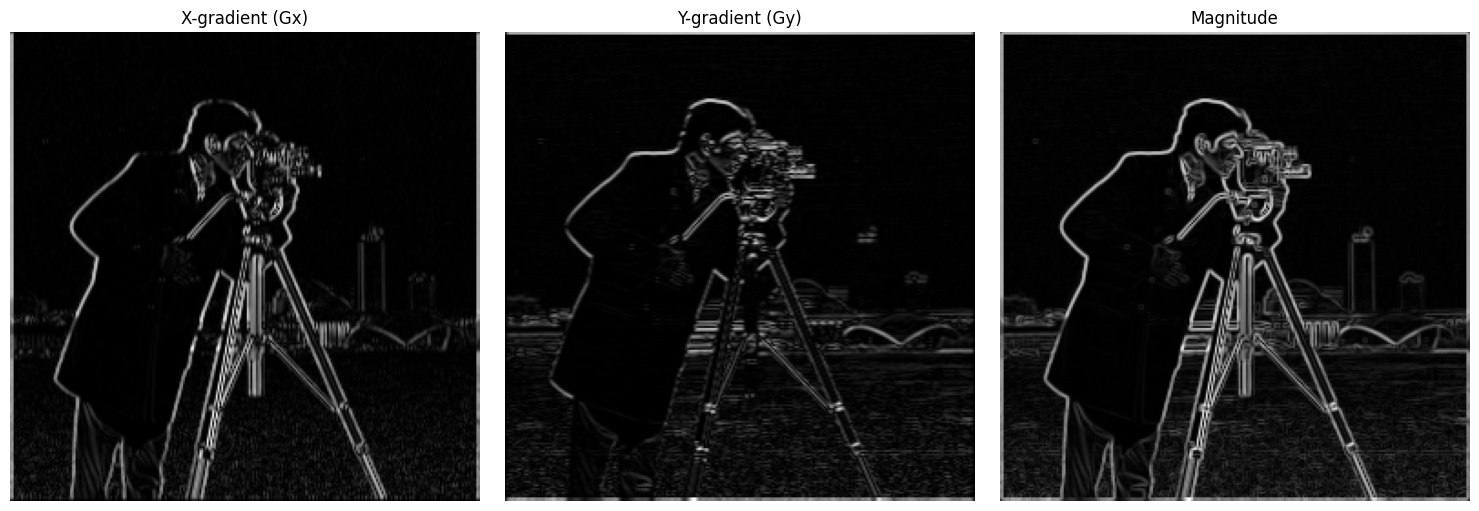

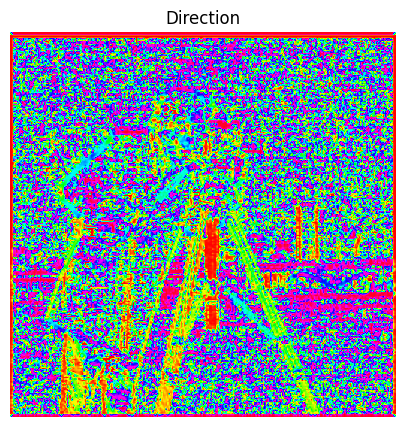

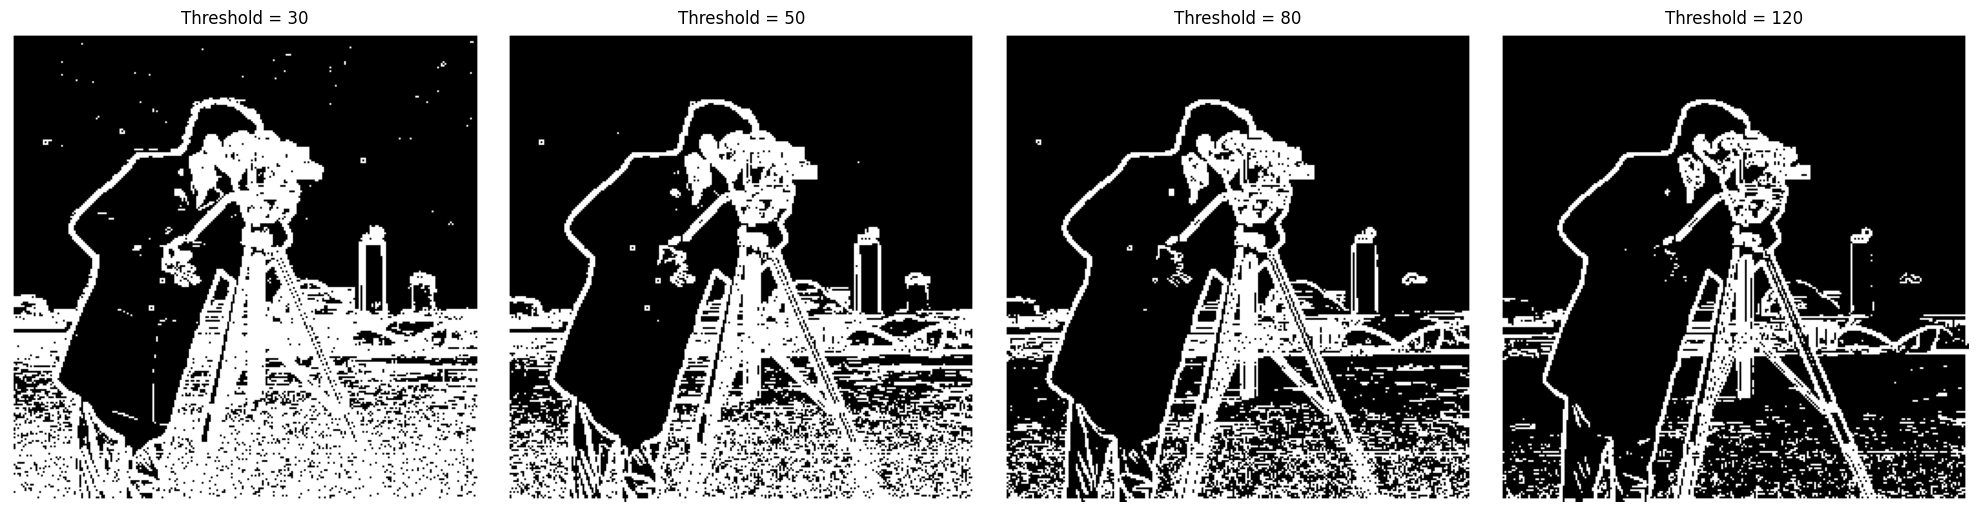

In [7]:
# Complete Task 1 - Sobel Edge Detection

# First, compute Y-gradient using Sobel operator
output_sobel_y = abs(scipy.signal.convolve2d(inputimg, sobel_y))

# Display Y-gradient
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(output_sobel_x, cmap="gray")
plt.title("X-gradient (Gx)")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(output_sobel_y, cmap="gray")
plt.title("Y-gradient (Gy)")
plt.axis('off')

# Function to compute magnitude
def magnitude(x, y):
    return np.sqrt(x**2 + y**2)

# Function to compute direction
def direction(x, y):
    return np.arctan2(y, x)

# Compute magnitude and direction
magnitude_img = magnitude(output_sobel_x, output_sobel_y)
direction_img = direction(output_sobel_x, output_sobel_y)

# Display magnitude and direction
plt.subplot(1, 3, 3)
plt.imshow(magnitude_img, cmap="gray")
plt.title("Magnitude")
plt.axis('off')
plt.tight_layout()
plt.show()

# Display direction image
plt.figure(figsize=(10, 5))
plt.imshow(direction_img, cmap="hsv")
plt.title("Direction")
plt.axis('off')

# Apply different thresholds and compare results
thresholds = [30, 50, 80, 120]

plt.figure(figsize=(20, 5))
for i, threshold in enumerate(thresholds):
    # Apply threshold
    edge_img = magnitude_img > threshold
    
    plt.subplot(1, 4, i+1)
    plt.imshow(edge_img, cmap="gray")
    plt.title(f"Threshold = {threshold}")
    plt.axis('off')

plt.tight_layout()
plt.show()

When changing the threshold, I noticed that higher thresholds make fewer edges appear, while lower thresholds show too many, including noise. With a low threshold, almost everything looks like an edge; with a high one, only the strongest outlines remain and some real edges disappear. The best results come from a proper balanced value that keeps clear edges without too much noise.

# Task 2

Repeat your previous exercise, with the Prewitt operator (see the lecture slides).


**QUESTION 2: What do you notice regarding the difference between Sobel and Prewitt? State both your observations and the reasons for the observations.**

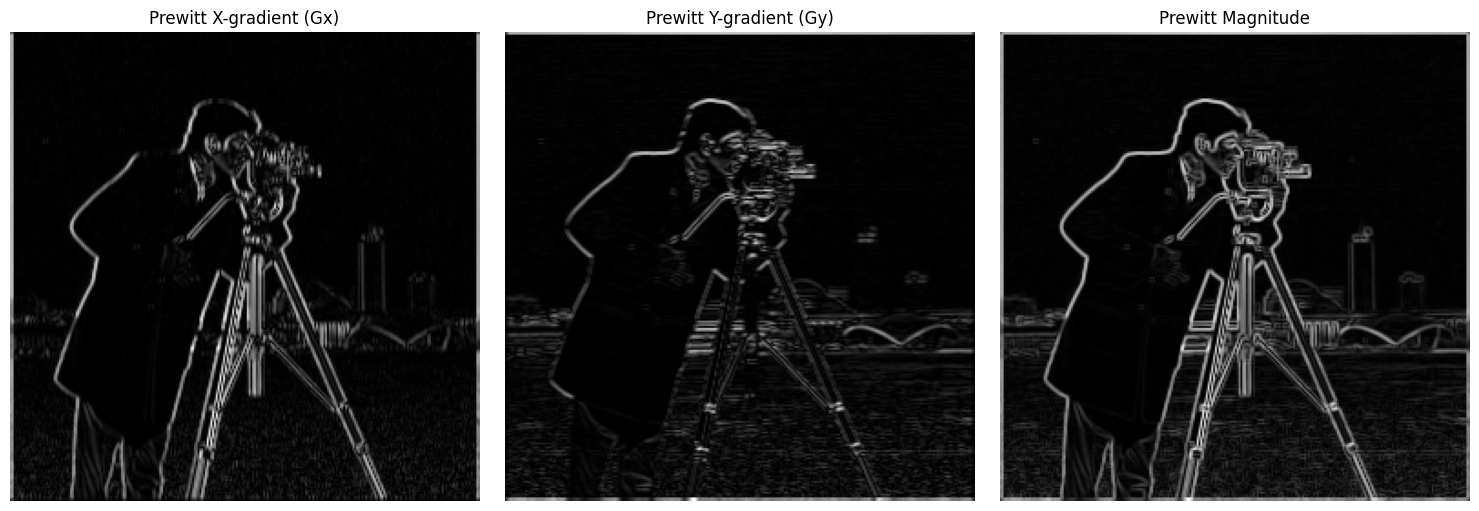

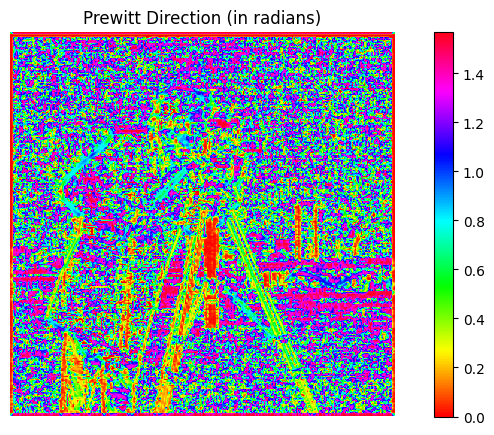

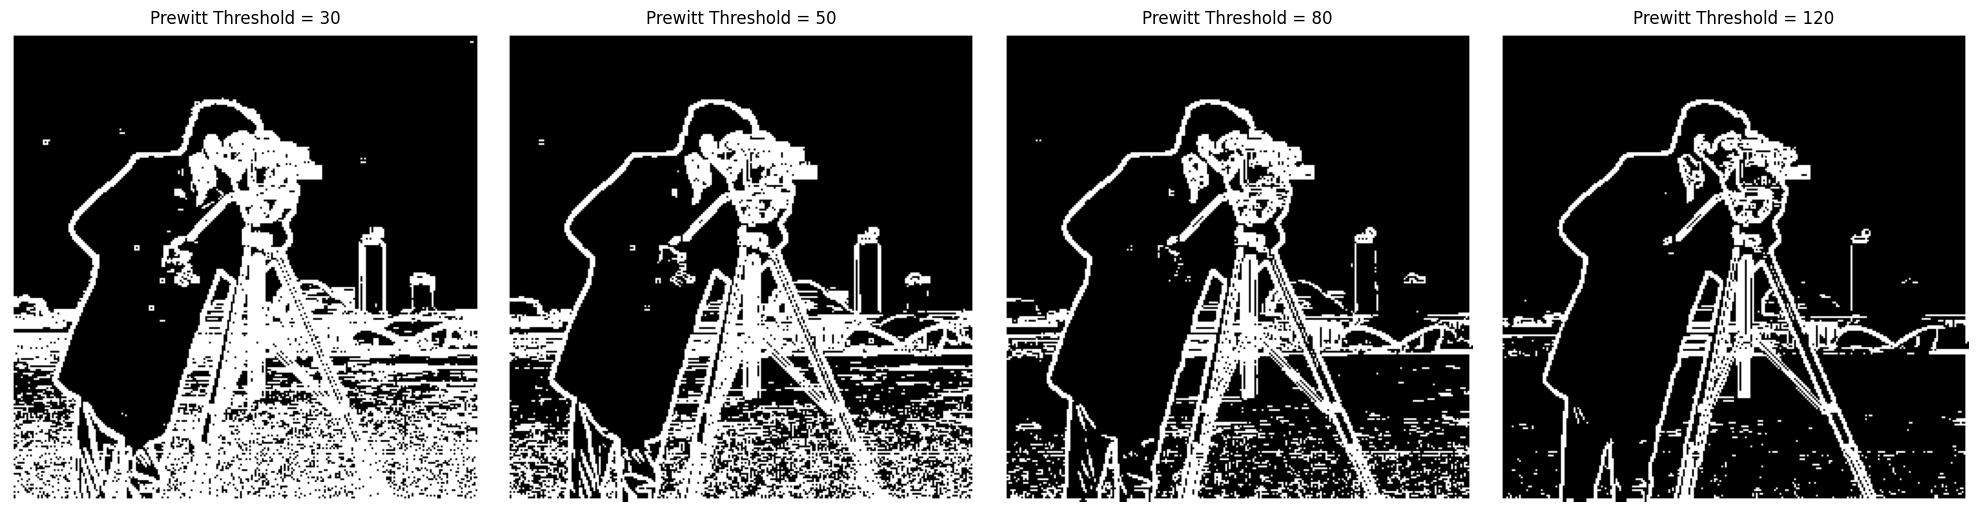

In [12]:
# Complete Task 2 - Prewitt Edge Detection

# Define Prewitt operators
prewitt_x = np.array([[-1, 0, 1],
                      [-1, 0, 1],
                      [-1, 0, 1]])

prewitt_y = np.array([[-1, -1, -1],
                      [ 0,  0,  0],
                      [ 1,  1,  1]])


# Apply Prewitt operators
output_prewitt_x = abs(scipy.signal.convolve2d(inputimg, prewitt_x))
output_prewitt_y = abs(scipy.signal.convolve2d(inputimg, prewitt_y))

# Display Prewitt gradients
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(output_prewitt_x, cmap="gray")
plt.title("Prewitt X-gradient (Gx)")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(output_prewitt_y, cmap="gray")
plt.title("Prewitt Y-gradient (Gy)")
plt.axis('off')

# Compute magnitude and direction using the same functions from Task 1
magnitude_prewitt = magnitude(output_prewitt_x, output_prewitt_y)
direction_prewitt = direction(output_prewitt_x, output_prewitt_y)

plt.subplot(1, 3, 3)
plt.imshow(magnitude_prewitt, cmap="gray")
plt.title("Prewitt Magnitude")
plt.axis('off')
plt.tight_layout()
plt.show()

# Display Prewitt direction image
plt.figure(figsize=(10, 5))
plt.imshow(direction_prewitt, cmap="hsv")
plt.title("Prewitt Direction (in radians)")
plt.colorbar()
plt.axis('off')


# Apply different thresholds for Prewitt
thresholds = [30, 50, 80, 120]

plt.figure(figsize=(20, 5))
for i, threshold in enumerate(thresholds):
    edge_img = magnitude_prewitt > threshold
    
    plt.subplot(1, 4, i+1)
    plt.imshow(edge_img, cmap="gray")
    plt.title(f"Prewitt Threshold = {threshold}")
    plt.axis('off')

plt.tight_layout()
plt.show()


Sobel and Prewitt are very similar edge detectors, but Sobel gives slightly cleaner and smoother results because it gives more weight to the center pixels, which helps reduce noise. Prewitt treats all rows equally, so it’s a bit more sensitive to noise and can look rougher. In most cases, Sobel is preferred because it’s more stable, though both detect edges in almost the same way.


# Task 3

You have to implement the Laplacian operator with and without diagonals. 

**QUESTION 3: What do you notice regarding the difference between including or discarding diagonal coefficients when calculating the edge?**

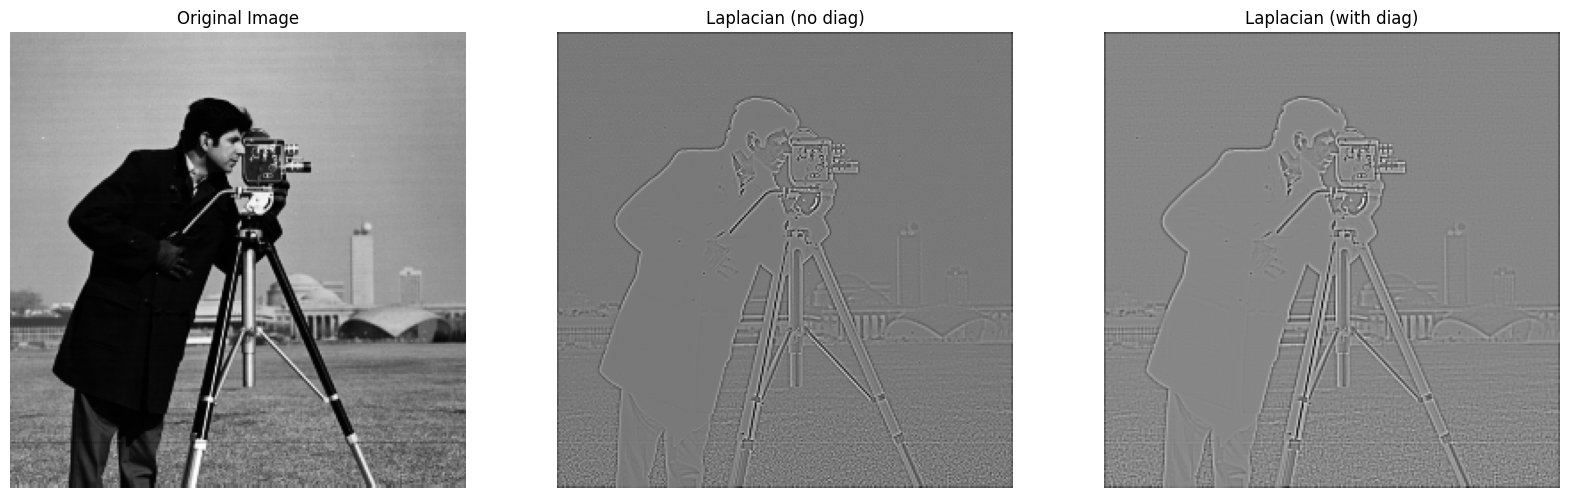

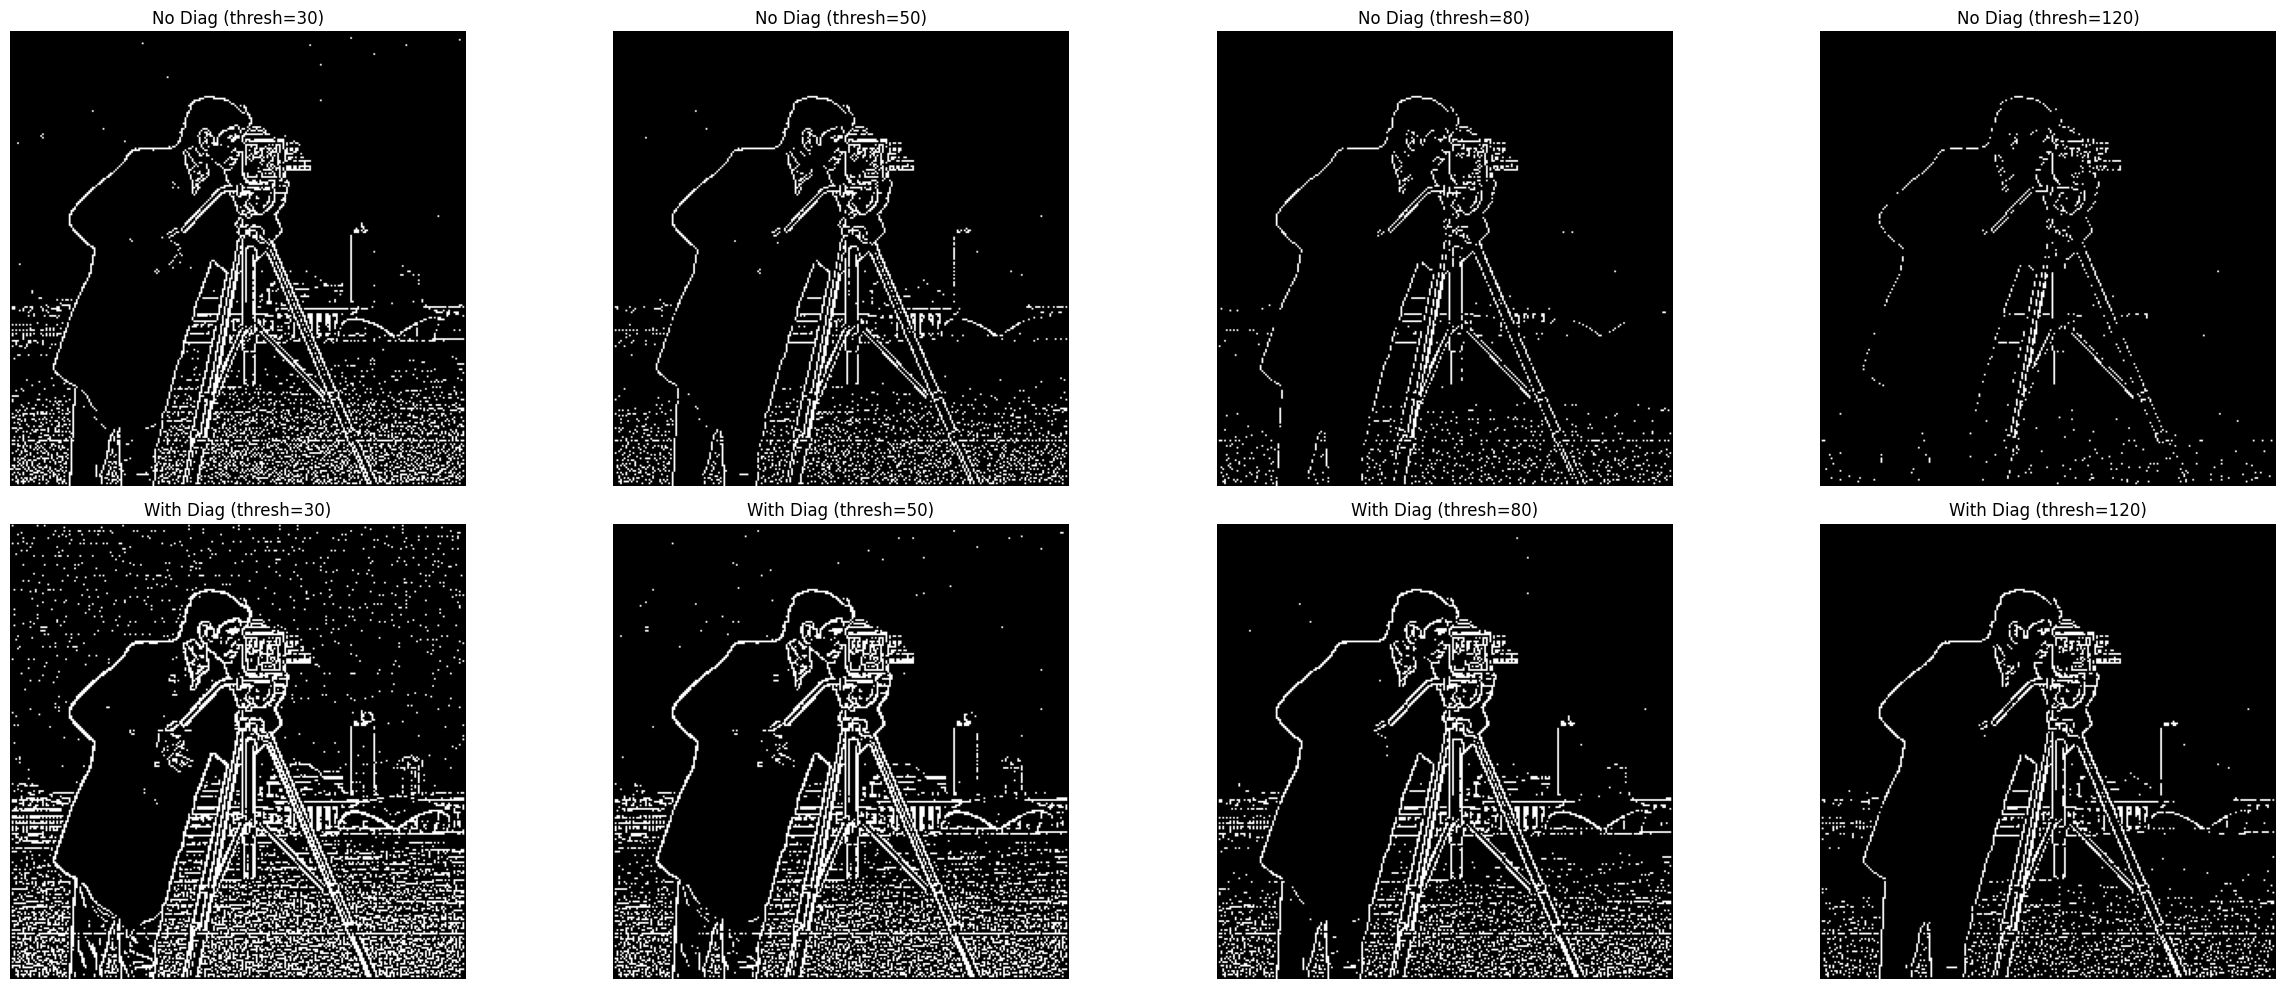

In [22]:
# Complete Task 3 - Laplacian Edge Detection

# Define Laplacian operator WITHOUT diagonals (4-connected)
laplacian_no_diag = np.array([[0,  1, 0],
                        [1, -4, 1],
                        [0,  1, 0]])

# Define Laplacian operator WITH diagonals (8-connected)
laplacian_with_diag = np.array([[1,  1, 1],
                        [1, -8, 1],
                        [1,  1, 1]])

# Apply Laplacian operators
output_laplacian_no_diag = scipy.signal.convolve2d(inputimg, laplacian_no_diag, mode='same')
output_laplacian_with_diag = scipy.signal.convolve2d(inputimg, laplacian_with_diag, mode='same')

# Display Laplacian results
plt.figure(figsize=(20, 10))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(inputimg, cmap="gray")
plt.title("Original Image")
plt.axis('off')

# Laplacian without diagonals
plt.subplot(1, 3, 2)
plt.imshow(output_laplacian_no_diag, cmap="gray")
plt.title("Laplacian (no diag)")
plt.axis('off')


# Laplacian with diagonals
plt.subplot(1, 3, 3)
plt.imshow(output_laplacian_with_diag, cmap="gray")
plt.title("Laplacian (with diag)")
plt.axis('off')



# Test different thresholds
thresholds = [30, 50, 80, 120]

plt.figure(figsize=(25, 10))
for i, threshold in enumerate(thresholds):
    # Without diagonals
    edge_no_diag = output_laplacian_no_diag > threshold
    plt.subplot(2, 4, i+1)
    plt.imshow(edge_no_diag, cmap="gray")
    plt.title(f"No Diag (thresh={threshold})")
    plt.axis('off')
    
    # With diagonals
    edge_with_diag = output_laplacian_with_diag > threshold
    plt.subplot(2, 4, i+5)
    plt.imshow(edge_with_diag, cmap="gray")
    plt.title(f"With Diag (thresh={threshold})")
    plt.axis('off')

plt.tight_layout()
plt.show()



Including diagonal coefficients makes the Laplacian detect edges in all directions, so the result shows more complete and detailed contours but also more noise. Without diagonals, the operator mainly detects horizontal and vertical edges, producing cleaner and simpler edge maps. In short, using diagonals gives richer edges, while excluding them gives smoother, less noisy results.


# Task 4
Reutilising the Gaussian filter you constructed in the previous lab session, implement the Canny edge detector. Remember to define $\theta_2 = 2*\theta_1$ or greater.
Compare the results against Sobel and Prewitt

**QUESTION 4: What do you observe about the different detected edge orientations? Which technique seems to be less sensitive to spurious edges?**

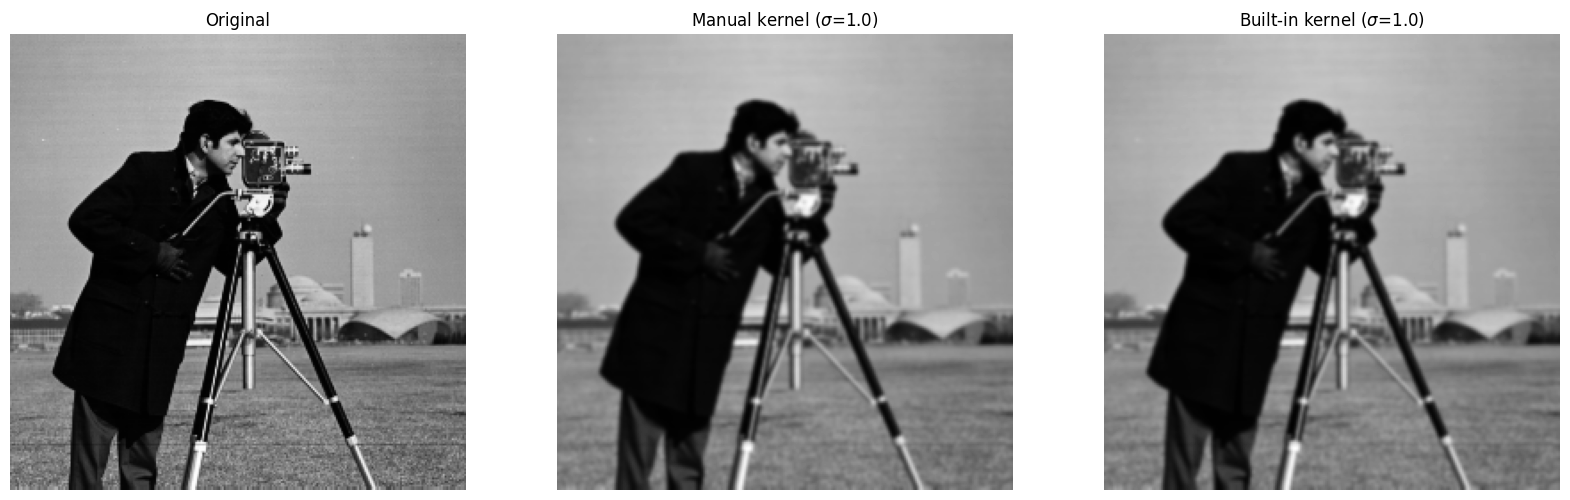

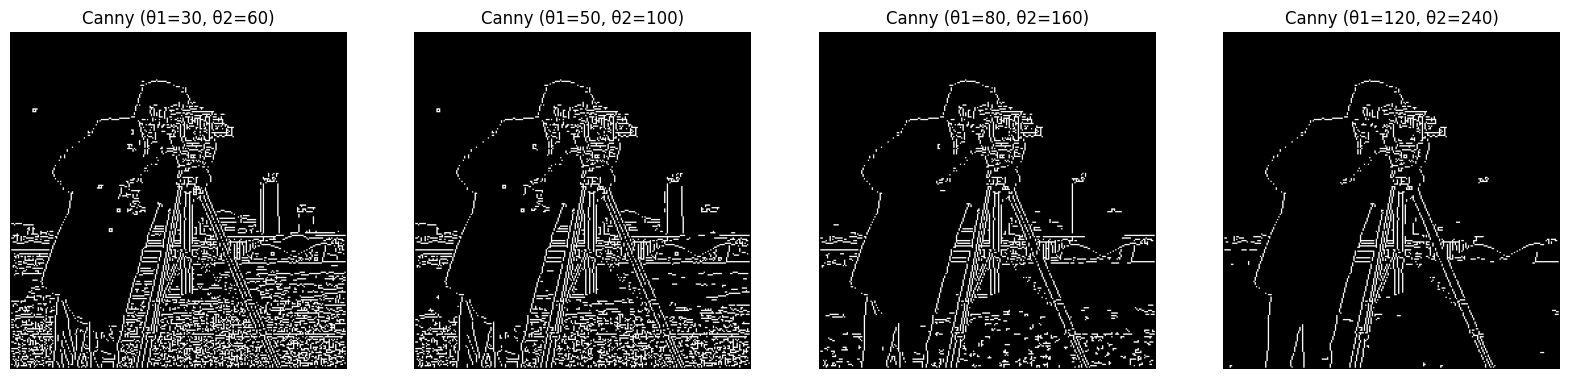

In [ ]:
# Complete Task 4 - Canny Edge Detection
# Reutilising the Gaussian filter you constructed in the previous lab session
sigma = 1.0
k_radius = int(4 * sigma)
size = 2 * k_radius + 1  # Ensures size is odd and large enough
center = size // 2
Gkernel = np.zeros((size, size))

for i in range(size):
    for j in range(size):
        s = i - center
        t = j - center
        Gkernel[i, j] = np.exp(-(s**2 + t**2) / (2 * sigma**2))

# Normalise the kernel
k = np.sum(Gkernel)
Gkernel = (1/k) * Gkernel

# Application remains:
img_blurred = gaussian_filter(inputimg, sigma=sigma)
img_mean_Gfiltered = convolve(inputimg, Gkernel)

# --- Display Code (Do Not Modify) ---
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(inputimg, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title(f'Manual kernel ($\sigma$={sigma})')
plt.imshow(img_mean_Gfiltered, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title(f'Built-in kernel ($\sigma$={sigma})')
plt.imshow(img_blurred, cmap='gray')
plt.axis('off')
plt.show()

# Now implement Canny edge detection
def canny_edge_detector(image, low_threshold, high_threshold):
    smoothed = image
    
    # Step 2: Compute gradients using Sobel operators
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    
    grad_x = scipy.signal.convolve2d(smoothed, sobel_x, mode='same')
    grad_y = scipy.signal.convolve2d(smoothed, sobel_y, mode='same')
    
    # Step 3: Compute gradient magnitude and direction
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    direction = np.arctan2(grad_y, grad_x)
    
    # Step 4: Non-maximum suppression
    edge_image = non_maximum_suppression(magnitude, direction)
    
    # Step 5: Hysteresis thresholding
    edge_image = hysteresis_thresholding(edge_image, low_threshold, high_threshold)
    
    return edge_image, magnitude, direction

def non_maximum_suppression(magnitude, direction):
    rows, cols = magnitude.shape
    suppressed = np.zeros_like(magnitude)
    
    # Convert direction to degrees and normalize to 0-180
    direction_deg = np.degrees(direction) % 180
    
    for i in range(1, rows - 1):
        for j in range(1, cols - 1): 
            # Determine the direction of the gradient
            angle = direction_deg[i, j]
            
            # Get neighboring pixels based on gradient direction
            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                neighbor1 = magnitude[i, j-1]
                neighbor2 = magnitude[i, j+1]
            elif 22.5 <= angle < 67.5:
                neighbor1 = magnitude[i-1, j+1]
                neighbor2 = magnitude[i+1, j-1]
            elif 67.5 <= angle < 112.5:
                neighbor1 = magnitude[i-1, j]
                neighbor2 = magnitude[i+1, j]
            else:  # 112.5 <= angle < 157.5
                neighbor1 = magnitude[i-1, j-1]
                neighbor2 = magnitude[i+1, j+1]
            
            # Keep pixel if it's a local maximum
            if magnitude[i, j] >= neighbor1 and magnitude[i, j] >= neighbor2:
                suppressed[i, j] = magnitude[i, j]
    
    return suppressed

def hysteresis_thresholding(image, low_threshold, high_threshold):
    """
    Apply hysteresis thresholding to connect weak edges
    """
    rows, cols = image.shape
    result = np.zeros_like(image, dtype=bool)
    
    # Strong edges
    strong_edges = image >= high_threshold
    weak_edges = (image >= low_threshold) & (image < high_threshold)
    
    # Start with strong edges
    result = strong_edges.copy()
    
    # Connect weak edges to strong edges
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            if weak_edges[i, j]:
                # Check if any of the 8 neighbors is a strong edge
                if np.any(strong_edges[i-1:i+2, j-1:j+2]):
                    result[i, j] = True
    
    return result

# Apply Canny edge detection with different threshold pairs
# Following the requirement: θ2 = 2*θ1 or greater
theta1_values = [30, 50, 80, 120]
theta2_values = [2 * t1 for t1 in theta1_values]  # θ2 = 2*θ1

plt.figure(figsize=(20, 10))

for i, (low_thresh, high_thresh) in enumerate(zip(theta1_values, theta2_values)):
    canny_edges, canny_magnitude, canny_direction = canny_edge_detector(
        img_blurred, low_thresh, high_thresh)
    
    plt.subplot(2, 4, i+1)
    plt.imshow(canny_edges, cmap="gray")
    plt.title(f"Canny (θ1={low_thresh}, θ2={high_thresh})")
    plt.axis('off')


Canny produces the thinnest and most accurate edges, detecting all orientations while being least affected by noise or false edges thanks to its Gaussian smoothing and double-threshold process. Sobel gives reasonably good edges but is more sensitive to noise, and Prewitt is the simplest and most noise-prone. Overall, Canny provides the cleanest and most reliable edge detection, while Sobel and Prewitt trade some quality for speed and simplicity.


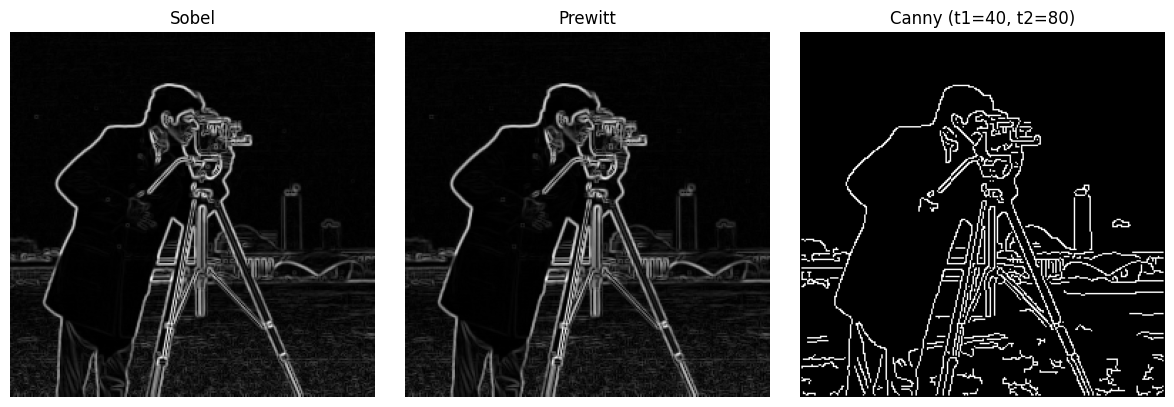

In [35]:
# Use functions in skimage.feature directly

import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, feature, color, io

img = io.imread('cameraman.png')

if len(img.shape) == 3:
    img = color.rgb2gray(img)
else:
    img = img.astype(np.float64) / 255.0

# --- Sobel ---
edges_sobel = filters.sobel(img)

# --- Prewitt ---
edges_prewitt = filters.prewitt(img)

# --- Canny (using Gaussian smoothing internally) ---
t1 = 40
t2 = 2 * t1    # θ2 = 2 * θ1
edges_canny = feature.canny(img, sigma=1.0,
                            low_threshold=t1/255,  # skimage expects 0~1 range
                            high_threshold=t2/255)

# --- Display ---
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(edges_sobel, cmap='gray'); plt.title('Sobel'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(edges_prewitt, cmap='gray'); plt.title('Prewitt'); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(edges_canny, cmap='gray'); plt.title(f'Canny (t1={t1}, t2={t2})'); plt.axis('off')
plt.tight_layout(); plt.show()
